In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Lectura y reorganización del dataset

In [2]:
file_path = 'depresión_ansiedad.csv'
data = pd.read_csv(file_path)
data.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [3]:
data.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

El dataset contiene varias variables, incluyendo datos numéricos y categóricos. Aquí está una breve descripción de los primeros registros y los tipos de cada columna:

- **índice:** id.
- **variables numéricas enteras:** school_year, age, phq_score, gad_score.
- **variables numéricas flotantes:** bmi, epworth_score.
- **variables categóricas:** gender, who_bmi, depression_severity, depressiveness, suicidal, depression_diagnosis, depression_treatment, anxiety_severity, anxiousness, anxiety_diagnosis, anxiety_treatment, sleepiness.

In [4]:
# Configurando 'id' como índice
data.set_index('id', inplace=True)

# Reordenando las columnas para que 'suicidal' sea la última
columns_order = [col for col in data.columns if col != 'suicidal'] + ['suicidal']
data = data[columns_order]

# Mostrando las primeras filas del dataframe reordenado
data.head()

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,11,Moderate,True,False,False,7.0,False,False
2,1,18,male,19.841270,Normal,8,Mild,False,False,False,5,Mild,False,False,False,14.0,True,False
3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,6,Mild,False,False,False,6.0,False,False
4,1,18,female,23.738662,Normal,19,Moderately severe,True,False,False,15,Severe,True,False,False,11.0,True,True
5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,14,Moderate,True,False,False,3.0,False,False


## Análisis de nulos y valores fuera de rango

In [5]:
# Definimos las columnas categóricas
categorical_columns = ['gender', 'who_bmi', 'depression_severity', 'depressiveness', 
                       'suicidal', 'depression_diagnosis', 'depression_treatment', 
                       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']

# Tratando los 0 como nulos en las columnas categóricas
for col in categorical_columns:
    data[col] = data[col].replace('0', np.nan)

# Tratando "Not Available" como nulo en "who_bmi"
data['who_bmi'] = data['who_bmi'].replace('Not Availble', np.nan)

# Recalculando los valores nulos totales
new_null_counts = data.isnull().sum()
new_null_counts[new_null_counts > 0]

who_bmi                 8
depression_severity     4
depressiveness          3
depression_diagnosis    1
depression_treatment    4
anxiety_severity        6
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
suicidal                1
dtype: int64

In [6]:
# Breve descripción de las variables numéricas
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school_year,783.0,2.277139,1.163633,1.0,1.00000,2.000000,3.000000,4.000000
age,783.0,20.233716,1.767217,18.0,19.00000,20.000000,21.000000,31.000000
bmi,783.0,23.420533,4.563630,0.0,20.98942,23.140496,25.519924,54.552668
phq_score,783.0,7.123883,4.426580,0.0,4.00000,6.000000,9.000000,24.000000
gad_score,783.0,6.810983,4.727352,0.0,3.00000,6.000000,9.000000,21.000000
epworth_score,775.0,6.376774,3.996443,0.0,3.50000,6.000000,9.000000,32.000000


En esta descripción vemos 2 variables con entradas que no tienen sentido:

- **BMI:** no puede tener como mínimo el 0, ya que es una medida de masa muscular y nunca ésta puede ser nula.
- **Epworth_score:** es una escala que mide la somnolencia puntuando como mínimo 0 y como máximo 24, por lo tanto no tiene sentido que el máximo sea 32.

In [7]:
# Verificando los valores fuera de rango:
out_of_range = {
    'school_year': ((data['school_year'] < 1) | (data['school_year'] > 4)),
    'phq_score': ((data['phq_score'] < 0) | (data['phq_score'] > 27)),
    'gad_score': ((data['gad_score'] < 0) | (data['gad_score'] > 21)),
    'epworth_score': ((data['epworth_score'] < 0) | (data['epworth_score'] > 24)),
    'bmi': (data['bmi'] <= 0)
}

out_of_range_counts = {key: data[filter].shape[0] for key, filter in out_of_range.items()}

out_of_range_counts

{'school_year': 0,
 'phq_score': 0,
 'gad_score': 0,
 'epworth_score': 2,
 'bmi': 8}

In [8]:
# Verificando valores inusuales para 'age'
age_issues = {
    'negative': (data['age'] < 0),
    'excessively_high': (data['age'] > 100)  # Asumiendo que 100 es un límite superior razonable
}

age_issues_counts = {key: data[filter].shape[0] for key, filter in age_issues.items()}

age_issues_counts

{'negative': 0, 'excessively_high': 0}

In [9]:
def contar_ceros_por_variable(data, variables):
    ceros_por_variable = {}
    for variable in variables:
        ceros_por_variable[variable] = (data[variable] == 0).sum()
    return ceros_por_variable

# Variables a analizar
variables = ['school_year', 'age', 'bmi', 'phq_score', 'gad_score', 'epworth_score']

# Llamada a la función y mostrar resultados
ceros_por_variable = contar_ceros_por_variable(data, variables)
for variable, cantidad in ceros_por_variable.items():
    print(f"Cantidad de ceros en '{variable}': {cantidad}")

Cantidad de ceros en 'school_year': 0
Cantidad de ceros en 'age': 0
Cantidad de ceros en 'bmi': 8
Cantidad de ceros en 'phq_score': 19
Cantidad de ceros en 'gad_score': 41
Cantidad de ceros en 'epworth_score': 24


### Manejo de valores nulos, valores fuera de rango y valores iguales a cero

#### BMI

##### Valores fuera de rango (en este caso, iguales a cero)

In [10]:
entries_with_bmi_zero_retry = data[data['bmi'] == 0]
entries_with_bmi_zero_retry

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
12,1,18,female,0.0,NaN,8,Mild,False,False,False,4,None-minimal,False,False,False,7.0,False,False
51,1,20,female,0.0,NaN,6,Mild,False,False,False,4,None-minimal,False,False,False,7.0,False,False
128,1,18,male,0.0,NaN,8,Mild,False,False,False,6,Mild,False,False,False,6.0,False,False
158,1,18,male,0.0,NaN,2,None-minimal,False,False,False,1,None-minimal,False,False,False,7.0,False,False
335,2,19,male,0.0,NaN,3,None-minimal,False,False,False,0,None-minimal,False,False,False,7.0,False,False
526,3,21,female,0.0,NaN,4,None-minimal,False,False,False,0,None-minimal,False,False,False,8.0,False,False
556,3,21,female,0.0,NaN,4,None-minimal,False,True,True,4,None-minimal,False,True,True,2.0,False,False
649,4,22,female,0.0,NaN,11,Moderate,True,True,True,6,Mild,False,True,True,10.0,True,False


In [11]:
# Calcular la mediana de BMI para cada grupo
grouped_median = data[data['bmi'] > 0].groupby(['gender', 'depressiveness', 'anxiousness'])['bmi'].median()

# Función para aplicar la mediana basada en el grupo
def apply_median(row):
    if row['bmi'] == 0:
        # Intenta obtener la mediana del grupo, si no está disponible, usa la mediana global de BMI
        return grouped_median.get((row['gender'], row['depressiveness'], row['anxiousness']), data['bmi'].median())
    return row['bmi']

# Aplicando la función para actualizar los valores de BMI
data['bmi'] = data.apply(apply_median, axis=1)

#### Who BMI

##### Valores nulos

In [12]:
entries_with_who_bmi_na = data[data['who_bmi'].isnull()]
entries_with_who_bmi_na

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
12,1,18,female,22.028024,NaN,8,Mild,False,False,False,4,None-minimal,False,False,False,7.0,False,False
51,1,20,female,22.028024,NaN,6,Mild,False,False,False,4,None-minimal,False,False,False,7.0,False,False
128,1,18,male,23.986870,NaN,8,Mild,False,False,False,6,Mild,False,False,False,6.0,False,False
158,1,18,male,23.986870,NaN,2,None-minimal,False,False,False,1,None-minimal,False,False,False,7.0,False,False
335,2,19,male,23.986870,NaN,3,None-minimal,False,False,False,0,None-minimal,False,False,False,7.0,False,False
526,3,21,female,22.028024,NaN,4,None-minimal,False,False,False,0,None-minimal,False,False,False,8.0,False,False
556,3,21,female,22.028024,NaN,4,None-minimal,False,True,True,4,None-minimal,False,True,True,2.0,False,False
649,4,22,female,23.054562,NaN,11,Moderate,True,True,True,6,Mild,False,True,True,10.0,True,False


In [13]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif 30 <= bmi <= 34.9:
        return 'Class I Obesity'
    elif 35 <= bmi <= 39.9:
        return 'Class II Obesity'
    else:
        return 'Class III Obesity'

# Aplicar la función para actualizar 'who_bmi' donde es nulo
data.loc[data['who_bmi'].isnull(), 'who_bmi'] = data[data['who_bmi'].isnull()]['bmi'].apply(categorize_bmi)

In [14]:
# Redondeando 'bmi' a dos decimales
data['bmi'] = data['bmi'].round(2)

#### PHQ score 

##### Valores iguales a cero

In [15]:
# Filtrar las entradas donde phq_score es cero
phq_zero = data[data['phq_score'] == 0]
phq_zero

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
25,1,18,male,22.76,Normal,0,NaN,NaN,False,False,6,Mild,False,False,False,11.0,True,False
40,1,18,male,20.57,Normal,0,NaN,True,False,False,7,Mild,False,False,False,0.0,False,True
133,1,20,male,24.21,Normal,0,none,False,False,False,2,None-minimal,False,False,False,7.0,False,False
219,1,19,male,20.90,Normal,0,none,False,False,False,0,None-minimal,False,False,False,7.0,False,False
393,2,19,male,24.22,Normal,0,NaN,NaN,False,False,6,Mild,False,False,False,7.0,False,False
445,2,19,male,25.25,Overweight,0,none,False,False,False,1,None-minimal,False,False,False,4.0,False,False
509,3,20,male,27.44,Overweight,0,none,False,False,False,1,None-minimal,False,False,False,0.0,False,False
518,3,20,male,21.80,Normal,0,none,False,False,False,0,None-minimal,False,False,False,1.0,False,False
531,3,21,male,26.53,Overweight,0,none,False,False,False,0,None-minimal,False,False,False,3.0,False,False


In [16]:
# Cantidad de entradas con phq_score igual a cero
phq_zero_count = phq_zero.shape[0]
phq_zero_count

19

Hay varias entradas en las que la depression_severity es igual al valor "none", esas entradas las dejamos como cero, pero vamos a tratar las entradas en las que "phq_score" = 0 y "depression_severity" = Nan", en ese caso vamos a utilizar la mediana en función de "depression_diagnosis", "depression_treatment" y "suicidal"

In [17]:
# Filtrar entradas con phq_score igual a 0 y depression_severity NaN
phq_zero_nan = data[(data['phq_score'] == 0) & (data['depression_severity'].isna())]

# Calcular la mediana de phq_score agrupada por depression_diagnosis, depression_treatment, y suicidal
median_phq_scores = data.groupby(['depression_diagnosis', 'depression_treatment', 'suicidal'])['phq_score'].median().reset_index()

# Mostrar los datos filtrados y las medianas calculadas
phq_zero_nan

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
25,1,18,male,22.76,Normal,0,NaN,NaN,False,False,6,Mild,False,False,False,11.0,True,False
40,1,18,male,20.57,Normal,0,NaN,True,False,False,7,Mild,False,False,False,0.0,False,True
393,2,19,male,24.22,Normal,0,NaN,NaN,False,False,6,Mild,False,False,False,7.0,False,False
537,3,20,male,21.20,Normal,0,NaN,NaN,False,False,8,Mild,False,False,False,1.0,False,NaN


In [18]:
# Mostrar las medianas calculadas
median_phq_scores

,depression_diagnosis,depression_treatment,suicidal,phq_score
0,False,False,False,6.0
1,False,False,True,11.0
2,False,True,False,7.5
3,False,True,True,14.0
4,True,False,False,10.0
5,True,False,True,8.5
6,True,True,False,8.0
7,True,True,True,15.0


In [19]:
# Imputar los valores de phq_score usando la mediana basada en los grupos correspondientes
for index, row in phq_zero_nan.iterrows():
    # Considerar la entrada solo si no tiene NaN en 'suicidal'
    if pd.notna(row['suicidal']):
        # Encontrar la mediana correspondiente
        median_value = median_phq_scores[
            (median_phq_scores['depression_diagnosis'] == row['depression_diagnosis']) &
            (median_phq_scores['depression_treatment'] == row['depression_treatment']) &
            (median_phq_scores['suicidal'] == row['suicidal'])
        ]['phq_score'].values[0]
        
        # Imputar el valor de la mediana
        data.loc[index, 'phq_score'] = median_value

# Verificar las entradas actualizadas para confirmar la imputación
data.loc[phq_zero_nan.index]

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
25,1,18,male,22.76,Normal,6.0,NaN,NaN,False,False,6,Mild,False,False,False,11.0,True,False
40,1,18,male,20.57,Normal,11.0,NaN,True,False,False,7,Mild,False,False,False,0.0,False,True
393,2,19,male,24.22,Normal,6.0,NaN,NaN,False,False,6,Mild,False,False,False,7.0,False,False
537,3,20,male,21.20,Normal,0.0,NaN,NaN,False,False,8,Mild,False,False,False,1.0,False,NaN


La entrada con ID 537 no ha sido imputada porque contiene un valor NaN en suicidal, lo que no encaja directamente con ningún grupo predefinido para calcular la mediana.

#### Depression severity

##### Valores nulos

In [20]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['depression_severity'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
25,1,18,male,22.76,Normal,6.0,NaN,NaN,False,False,6,Mild,False,False,False,11.0,True,False
40,1,18,male,20.57,Normal,11.0,NaN,True,False,False,7,Mild,False,False,False,0.0,False,True
393,2,19,male,24.22,Normal,6.0,NaN,NaN,False,False,6,Mild,False,False,False,7.0,False,False
537,3,20,male,21.20,Normal,0.0,NaN,NaN,False,False,8,Mild,False,False,False,1.0,False,NaN


In [21]:
data.depression_severity.unique()

array(['Mild', 'Moderately severe', 'None-minimal', 'Moderate', nan,
       'Severe', 'none'], dtype=object)

In [22]:
# Definir una función para clasificar la severidad basada en phq_score
def classify_severity(score):
    if score <= 4:
        return 'None-minimal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    elif score <= 19:
        return 'Moderately severe'
    else:
        return 'Severe'

# Aplicar la función para actualizar los valores NaN en depression_severity basado en phq_score
data.loc[data['depression_severity'].isna(), 'depression_severity'] = data['phq_score'].apply(classify_severity)

In [23]:
# Actualizar los valores en la columna 'depression_severity'
data['depression_severity'].replace({'none': 'None-minimal', 'Moderately severe': 'Severe'}, inplace=True)

# Verificar los cambios realizados en la columna
data['depression_severity'].value_counts()

Mild            346
None-minimal    242
Moderate        141
Severe           54
Name: depression_severity, dtype: int64

#### Depressiveness

In [24]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['depressiveness'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
25,1,18,male,22.76,Normal,6.0,Mild,NaN,False,False,6,Mild,False,False,False,11.0,True,False
393,2,19,male,24.22,Normal,6.0,Mild,NaN,False,False,6,Mild,False,False,False,7.0,False,False
537,3,20,male,21.20,Normal,0.0,None-minimal,NaN,False,False,8,Mild,False,False,False,1.0,False,NaN


In [25]:
# Calcular la moda de 'depressiveness' solo para cada combinación de 'depression_severity' y 'depression_diagnosis'
mode_depressiveness_severity_diag = data.groupby(['depression_severity', 'depression_diagnosis'])['depressiveness'].agg(pd.Series.mode).reset_index()

# Expansión de los resultados de la moda en casos de múltiples modas, tomando la primera
mode_depressiveness_severity_diag = mode_depressiveness_severity_diag.explode('depressiveness')

# Verificar los resultados obtenidos
mode_depressiveness_severity_diag.head()

,depression_severity,depression_diagnosis,depressiveness
0,Mild,False,False
1,Mild,True,False
2,Moderate,False,True
3,Moderate,True,True
4,None-minimal,False,False


In [26]:
# Imputar los valores nulos en 'depressiveness' usando la moda del nuevo grupo correspondiente
for index, row in data[data['depressiveness'].isna()].iterrows():
    # Encontrar la moda correspondiente para el nuevo grupo
    group_mode = mode_depressiveness_severity_diag[
        (mode_depressiveness_severity_diag['depression_severity'] == row['depression_severity']) &
        (mode_depressiveness_severity_diag['depression_diagnosis'] == row['depression_diagnosis'])
    ]['depressiveness'].values[0]
    
    # Imputar el valor modal
    data.at[index, 'depressiveness'] = group_mode

#### Depression diagnosis

##### Valores nulos

In [27]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['depression_diagnosis'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
702,4,22,female,19.95,Normal,6.0,Mild,False,NaN,NaN,0,NaN,NaN,NaN,False,4.0,False,False


In [28]:
# Sustituir los valores nulos en 'depression_diagnosis' por False
data['depression_diagnosis'].fillna(False, inplace=True)

#### Depression treatment

##### Valores nulos

In [29]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['depression_treatment'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
298,2,20,male,23.15,Normal,7.0,Mild,True,False,NaN,5,Mild,False,False,False,8.0,False,True
382,2,19,female,22.94,Normal,7.0,Mild,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False
452,2,19,male,26.45,Overweight,3.0,None-minimal,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,False
702,4,22,female,19.95,Normal,6.0,Mild,False,False,NaN,0,NaN,NaN,NaN,False,4.0,False,False


In [30]:
# Calcular la moda de 'depression_treatment' para cada combinación de 'depression_severity', 'depressiveness', y 'depression_diagnosis'
mode_depression_treatment = data.groupby(['depression_severity', 'depressiveness', 'depression_diagnosis'])['depression_treatment'].agg(pd.Series.mode).reset_index()

# Expansión de los resultados de la moda en casos de múltiples modas, tomando la primera
mode_depression_treatment = mode_depression_treatment.explode('depression_treatment')

# Verificar los resultados obtenidos
mode_depression_treatment.head()

,depression_severity,depressiveness,depression_diagnosis,depression_treatment
0,Mild,False,False,False
1,Mild,False,True,True
2,Mild,True,False,False
3,Mild,True,True,False
4,Moderate,True,False,False


In [31]:
# Imputación de los valores nulos en 'depression_treatment' usando la moda del grupo correspondiente
for index, row in data[data['depression_treatment'].isna()].iterrows():
    # Encontrar la moda correspondiente para el grupo
    group_mode = mode_depression_treatment[
        (mode_depression_treatment['depression_severity'] == row['depression_severity']) &
        (mode_depression_treatment['depressiveness'] == row['depressiveness']) &
        (mode_depression_treatment['depression_diagnosis'] == row['depression_diagnosis'])
    ]['depression_treatment'].values[0]
    
    # Imputar el valor modal
    data.at[index, 'depression_treatment'] = group_mode

#### GAD score

##### Valores iguales a cero

In [32]:
# Filtrar las entradas donde gad_score es 0 y alguna de las columnas de ansiedad tiene un valor NaN
gad_score_zero_with_nans = data[
    (data['gad_score'] == 0) & 
    (data['anxiety_severity'].isna() | 
     data['anxiousness'].isna() | 
     data['anxiety_diagnosis'].isna() | 
     data['anxiety_treatment'].isna())
]

# Mostrar las entradas filtradas
gad_score_zero_with_nans

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
23,1,19,male,26.88,Overweight,14.0,Moderate,True,False,False,0,NaN,NaN,False,False,8.0,False,True
24,1,19,female,24.39,Normal,4.0,None-minimal,False,False,False,0,NaN,NaN,False,False,4.0,False,False
382,2,19,female,22.94,Normal,7.0,Mild,False,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,False
406,2,19,female,22.48,Normal,11.0,Moderate,True,False,False,0,NaN,NaN,False,True,0.0,False,True
452,2,19,male,26.45,Overweight,3.0,None-minimal,False,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,False
702,4,22,female,19.95,Normal,6.0,Mild,False,False,False,0,NaN,NaN,NaN,False,4.0,False,False


In [33]:
# Eliminar las entradas usando el índice directamente, que coincide con el ID
data = data.drop(index=[382, 452])

In [34]:
# Calcular la mediana de 'gad_score' para cada combinación de 'anxiety_treatment' y 'suicidal'
median_gad_scores = data.groupby(['anxiety_treatment', 'suicidal'])['gad_score'].median().reset_index()

# Verificar las medianas calculadas
median_gad_scores

,anxiety_treatment,suicidal,gad_score
0,False,False,6
1,False,True,10
2,True,False,7
3,True,True,10


In [35]:
# Sustituir los valores cero en 'gad_score' por la mediana del grupo correspondiente
for index, row in data[data['gad_score'] == 0].iterrows():
    # Encontrar la mediana correspondiente
    median_value = median_gad_scores[
        (median_gad_scores['anxiety_treatment'] == row['anxiety_treatment']) &
        (median_gad_scores['suicidal'] == row['suicidal'])
    ]['gad_score'].values[0]
    
    # Sustituir el valor cero con la mediana encontrada
    data.at[index, 'gad_score'] = median_value

#### Anxiety severity

##### Valores nulos

In [36]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['anxiety_severity'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
23,1,19,male,26.88,Overweight,14.0,Moderate,True,False,False,10,NaN,NaN,False,False,8.0,False,True
24,1,19,female,24.39,Normal,4.0,None-minimal,False,False,False,6,NaN,NaN,False,False,4.0,False,False
406,2,19,female,22.48,Normal,11.0,Moderate,True,False,False,10,NaN,NaN,False,True,0.0,False,True
702,4,22,female,19.95,Normal,6.0,Mild,False,False,False,6,NaN,NaN,NaN,False,4.0,False,False


In [37]:
# Definir una función para clasificar la severidad de la ansiedad basada en gad_score
def classify_anxiety_severity(gad_score):
    if gad_score <= 4:
        return 'None-minimal'
    elif gad_score <= 9:
        return 'Mild'
    elif gad_score <= 14:
        return 'Moderate'
    else:
        return 'Severe'

# Aplicar la función para actualizar los valores NaN en anxiety_severity basado en gad_score
data.loc[data['anxiety_severity'].isna(), 'anxiety_severity'] = data['gad_score'].apply(classify_anxiety_severity)

#### Anxiousness

##### Valores nulos

In [38]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['anxiousness'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
23,1,19,male,26.88,Overweight,14.0,Moderate,True,False,False,10,Moderate,NaN,False,False,8.0,False,True
24,1,19,female,24.39,Normal,4.0,None-minimal,False,False,False,6,Mild,NaN,False,False,4.0,False,False
406,2,19,female,22.48,Normal,11.0,Moderate,True,False,False,10,Moderate,NaN,False,True,0.0,False,True
702,4,22,female,19.95,Normal,6.0,Mild,False,False,False,6,Mild,NaN,NaN,False,4.0,False,False


In [39]:
# Calcular la moda de 'anxiousness' para cada combinación de 'anxiety_severity' y 'anxiety_treatment'
mode_anxiousness = data.groupby(['anxiety_severity', 'anxiety_treatment'])['anxiousness'].agg(pd.Series.mode).reset_index()

# Expansión de los resultados de la moda en casos de múltiples modas, tomando la primera
mode_anxiousness = mode_anxiousness.explode('anxiousness')

# Verificar los resultados obtenidos
mode_anxiousness.head()

,anxiety_severity,anxiety_treatment,anxiousness
0,Mild,False,False
1,Mild,True,False
2,Moderate,False,True
3,Moderate,True,True
4,None-minimal,False,False


In [40]:
# Imputación de los valores nulos en 'anxiousness' usando la moda del grupo correspondiente
for index, row in data[data['anxiousness'].isna()].iterrows():
    # Encontrar la moda correspondiente para el grupo
    group_mode = mode_anxiousness[
        (mode_anxiousness['anxiety_severity'] == row['anxiety_severity']) &
        (mode_anxiousness['anxiety_treatment'] == row['anxiety_treatment'])
    ]['anxiousness'].values[0]
    
    # Imputar el valor modal
    data.at[index, 'anxiousness'] = group_mode

#### Anxiety diagnosis

##### Valores nulos

In [41]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['anxiety_diagnosis'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
291,2,21,female,33.06,Class I Obesity,12.0,Moderate,True,False,False,8,Mild,False,NaN,False,6.0,False,False
702,4,22,female,19.95,Normal,6.0,Mild,False,False,False,6,Mild,False,NaN,False,4.0,False,False


In [42]:
# Calcular la moda de 'anxiety_diagnosis' para cada combinación de 'anxiety_severity', 'anxiousness' y 'anxiety_treatment'
mode_anxiety_diagnosis = data.groupby(['anxiety_severity', 'anxiety_treatment'])['anxiety_diagnosis'].agg(pd.Series.mode).reset_index()

# Expansión de los resultados de la moda en casos de múltiples modas, tomando la primera
mode_anxiety_diagnosis = mode_anxiety_diagnosis.explode('anxiety_diagnosis')

# Verificar los resultados obtenidos
mode_anxiety_diagnosis.head()

,anxiety_severity,anxiety_treatment,anxiety_diagnosis
0,Mild,False,False
1,Mild,True,False
1,Mild,True,True
2,Moderate,False,False
3,Moderate,True,True


In [43]:
# Imputación de los valores nulos en 'anxiousness' usando la moda del grupo correspondiente
for index, row in data[data['anxiety_diagnosis'].isna()].iterrows():
    # Encontrar la moda correspondiente para el grupo
    group_mode = mode_anxiety_diagnosis[
        (mode_anxiousness['anxiety_severity'] == row['anxiety_severity']) &
        (mode_anxiousness['anxiety_treatment'] == row['anxiety_treatment'])
    ]['anxiety_diagnosis'].values[0]
    
    # Imputar el valor modal
    data.at[index, 'anxiety_diagnosis'] = group_mode

C:\Users\diego\anaconda3\envs\Machine_learning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Epworth score

##### Valores nulos

In [44]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['epworth_score'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
30,1,18,female,21.60,Normal,2.0,None-minimal,False,False,False,6,None-minimal,False,False,False,NaN,NaN,False
167,1,18,male,28.09,Overweight,2.0,None-minimal,False,False,False,1,None-minimal,False,False,False,NaN,NaN,False
169,1,18,female,19.95,Normal,4.0,None-minimal,False,False,False,5,Mild,False,False,False,NaN,NaN,False
223,1,19,female,22.21,Normal,8.0,Mild,False,False,False,8,Mild,False,False,False,NaN,NaN,False
439,2,19,male,26.23,Overweight,10.0,Moderate,True,False,False,9,Mild,False,False,False,NaN,NaN,False
552,3,21,female,23.11,Normal,5.0,Mild,False,False,False,5,Mild,False,False,False,NaN,NaN,False


In [45]:
# Calcular la mediana de 'epworth_score' para cada combinación de 'depression_severity' y 'anxiety_severity'
median_epworth_scores = data.groupby(['depression_severity', 'anxiety_severity'])['epworth_score'].median().reset_index()

# Verificar las medianas calculadas
median_epworth_scores

,depression_severity,anxiety_severity,epworth_score
0,Mild,Mild,6.0
1,Mild,Moderate,7.5
2,Mild,None-minimal,5.0
3,Mild,Severe,7.0
4,Moderate,Mild,8.0
5,Moderate,Moderate,8.0
6,Moderate,None-minimal,7.0
7,Moderate,Severe,8.5
8,None-minimal,Mild,5.0
9,None-minimal,Moderate,3.5


In [46]:
# Sustituir los valores nulos en 'epworth_score' por la mediana del grupo correspondiente
for index, row in data[data['epworth_score'].isnull()].iterrows():
    # Encontrar la mediana correspondiente
    median_value = median_epworth_scores[
        (median_epworth_scores['depression_severity'] == row['depression_severity']) &
        (median_epworth_scores['anxiety_severity'] == row['anxiety_severity'])
    ]['epworth_score'].values[0]
    
    # Sustituir el valor cero con la mediana encontrada
    data.at[index, 'epworth_score'] = median_value

##### Valores fuera de rango

In [47]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[data['epworth_score'] > 24]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
408,2,21,female,33.06,Class I Obesity,20.0,Severe,True,False,False,16,Severe,True,False,False,31.0,True,False
427,2,19,male,23.89,Normal,10.0,Moderate,True,True,True,8,Mild,False,False,False,32.0,True,True


In [48]:
# Reemplazar los valores de 'epworth_score' mayores que 24 por 24
data.loc[data['epworth_score'] > 24, 'epworth_score'] = 24

##### Valores iguales a cero

#### Sleepiness

##### Valores nulos

In [49]:
# Filtrando las entradas que tienen valores nulos
entries_with_nulls = data[(data['sleepiness'].isnull())]
entries_with_nulls

,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness,suicidal
id,,,,,,,,,,,,,,,,,,
30,1,18,female,21.60,Normal,2.0,None-minimal,False,False,False,6,None-minimal,False,False,False,4.0,NaN,False
167,1,18,male,28.09,Overweight,2.0,None-minimal,False,False,False,1,None-minimal,False,False,False,4.0,NaN,False
169,1,18,female,19.95,Normal,4.0,None-minimal,False,False,False,5,Mild,False,False,False,5.0,NaN,False
223,1,19,female,22.21,Normal,8.0,Mild,False,False,False,8,Mild,False,False,False,6.0,NaN,False
439,2,19,male,26.23,Overweight,10.0,Moderate,True,False,False,9,Mild,False,False,False,8.0,NaN,False
552,3,21,female,23.11,Normal,5.0,Mild,False,False,False,5,Mild,False,False,False,6.0,NaN,False


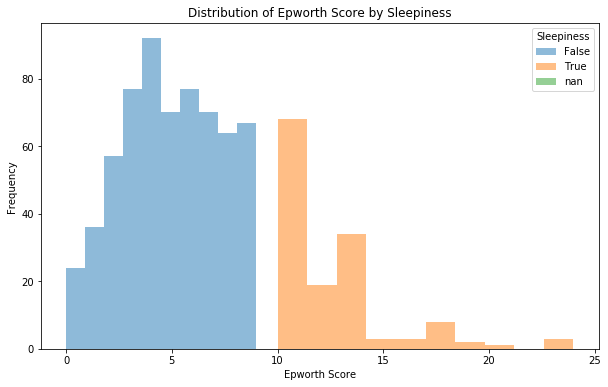

In [50]:
# Suponiendo que 'sleepiness' existe en tu conjunto de datos
plt.figure(figsize=(10, 6))
for sleepiness_category in data['sleepiness'].unique():
    plt.hist(data[data['sleepiness'] == sleepiness_category]['epworth_score'], bins=10, alpha=0.5, label=sleepiness_category)

plt.xlabel('Epworth Score')
plt.ylabel('Frequency')
plt.title('Distribution of Epworth Score by Sleepiness')
plt.legend(title='Sleepiness')
plt.show()

In [51]:
# Sustituir los valores nulos en "sleepiness" por False
data['sleepiness'].fillna(False, inplace=True)

#### Suicidal

##### Valores nulos

In [52]:
# Eliminar las entradas donde la variable "suicidal" es nula
data.dropna(subset=['suicidal'], inplace=True)

In [53]:
# Guardar el dataset modificado en un archivo CSV
data.to_csv('depresión_ansiedad_1.csv', index=False)